
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [71]:
!pip install plotly matplotlib seaborn --quiet

In [72]:
# імпорт бібліотек

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

# встановлення рендерера для графіків plotly в jupyter notebook
#pio.renderers.default = "plotly_mimetype+notebook"

In [73]:
# завантаження даних

medical_df = pd.read_csv("https://raw.githubusercontent.com/roldugina/Machine_learning_course/main/medical-charges.csv")

In [74]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Ідеї щодо прогнозування колонки charges**

1. Виявити, які фактори впливають на цільову змінну - подивитись на матрицю кореляції, проаналізувати вплив категоріальних змінних.
1. Для кожної числової змінної, яка впливає на таргет, побудувати графік залежності таргета від цієї змінної.
1. Якщо є лінійна залежність, можна спробувати розрахувати її параметри. Наприклад, взяти середнє 5-10 мінімальних та 5-10 максимальних значень таргету, провести умовну лінію через ці 2 точки, і за їхніми координатами розрахувати параметри лінії.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [76]:
# функція для будування гістограми plotly з розбиттям за категоріями ознак

def box_discrete_categories(color_category, color_sequence, plot_title):

  fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color=color_category,
                    color_discrete_sequence=color_sequence,
                    title=plot_title)
  fig.update_layout(bargap=0.1)
  fig.show()

In [77]:
box_discrete_categories('sex',['darkgreen','darkseagreen'], 'Annual Medical Charges')

**Висновки**

* Розподіл має правоскошений характер. Більшість значень сконцентровані на проміжку 2 000-12 000, є довгий хвіст до 64 000 з невеликим підвищенням в районі 34 000 - 38 000.
* Медіана 9 412 у жінок та 9 369 у чоловіків, тобто майже однакова. Значення 1 квантилю приблизно однакове для чоловіків та жінок, а 3 квантиль суттєво вищий у чоловіків (14 456 та 19 007 жінки / чоловіки). Взагалі витрати для чоловіків розсіяні значно сильніше (максимальне значення без урахування викидів у чоловіків значно вище.
* суму виплат 4 000 - 12 000 виплачує приблизно однакова кількість чоловіків та жінок, в структурі виплат вище ніж 20 000 більшість складають чоловіки.

In [78]:
# вибір кольорів
viridis_colors = px.colors.sequential.Viridis
selected_colors = [viridis_colors[0], viridis_colors[2], viridis_colors[5], viridis_colors[8]]

In [79]:
box_discrete_categories('region',selected_colors, 'Annual Medical Charges')

**Висновки**

* мешканці кожного району майже рівномірно представлені на проміжку виплат до 26 тис.(відсоток мешканців різних районів приблизно однаковий).
* Виключення - мешканці району southwest не мають платежів 28-34 тис та вище ніж 54 тис.
* медіанне значення району northeast (10 058) вище, ніж медіана в середньому за вибіркою (9 382). Медіана charges для мешканців інших районів менша, ніж в середньому за вибіркою.
* мінімальний рівень розкиду суми платежів у мешканців southwest (upper fence 26 236), максимальний - у southeast (upper fence 40 182). Аналогічна ситуація з 4 квантилем.
* майже всі викиди сконцентровані на проміжку до 50 тис. Випадки charges вище ніж 50 тис. одиничні.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [80]:
# функція для візуалізації розподілу столбців

def hist_categories(distr_category, color_sequence, plot_title):

  fig = px.histogram(medical_df,
                     x = distr_category,
                     color = 'smoker',
                     title = plot_title,
                     color_discrete_sequence = color_sequence)
  fig.update_layout(bargap = 0.3,width = 650)
  fig.show()

In [81]:
hist_categories('region', ['rgb(237,125,93)','rgb(113,168,195)'],'Розподіл по районам відносно Smoker yes/no')

**Висновки**

* Кількість людей з різних районів майже однакова (єдине виключення - район southeast).
* не курців значно більше, ніж курців;
* у всіх районах, крім southeast, відсоток курців майже однаковий. В southeast відсоток курців трохи більший (25%).

In [82]:
hist_categories('children', ['rgb(237,125,93)','rgb(113,168,195)'],'Розподіл кількості дітей відносно Smoker yes/no')

**Висновки**

* Кількість людей, які мають певну кількість дітей, зменшується з ростом кількості дітей.
* При кількості дітей до 3 включно відсоток клієнтів, які не палять, приблизно однаковий (20-25%).
* При більшій кількості дітей відсоток курців різко знижується.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [83]:
# будуємо violin plot

fig = px.violin(medical_df,
                   y ='charges' ,
                   color = 'children',
                   title = 'Звʼязок між стовпцями Charges та Children',
                   points = 'outliers',
                   box = True,
                   color_discrete_sequence = viridis_colors,
                   category_orders = {'children' : sorted(medical_df.children.unique())})
fig.update_layout(bargap = 0.3,width = 1200,height = 800)
fig.show()

**Висновки**

* Медіана платежів не дуже суттєво залежить від кількості дітей, вона находиться між 8 590 (5 дітей) та 11 133 (4 дітей).
* У чотирьох випадках (від 1 до 4 дітей) розподіл зміщений вліво. Тобто, люди з 1-4 дітьми платять ближче до мінімальних сум платежів.
* У всіх групах окрім людей з 5 дітьми є довгі хвости, тобто є люди, які платять суттєво вище інших.
* У людей без дітей є тенденція платити або менше медіанного значення, або більше.
* Платежі людей з 5 дітьми мають суттєво нижчий рівень розсіяності, ніж інших.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [84]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [85]:
def estimate_charges(age, w, b):
    return w * age + b

In [86]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

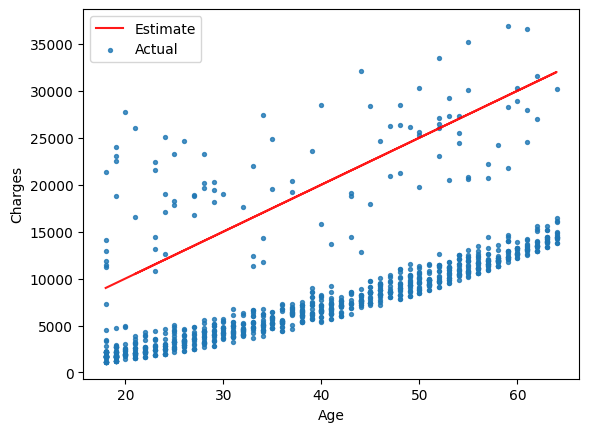

In [87]:
try_parameters(non_smoker_df,500,0)

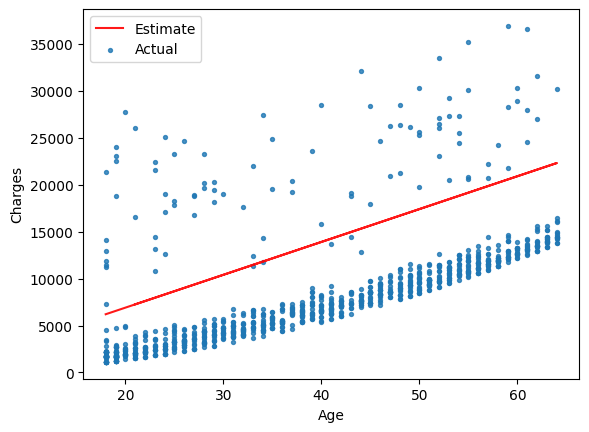

In [88]:
try_parameters(non_smoker_df,350,-100)

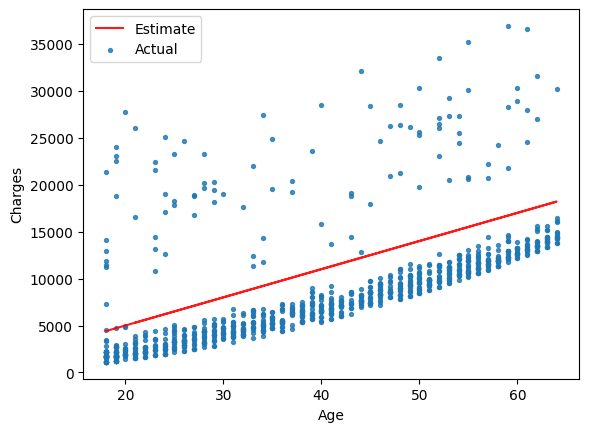

In [89]:
try_parameters(non_smoker_df,300,-1000)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [90]:
# обчислення rmse

def rmse(df,w,b):
  ages = df.age
  target = df.charges
  estimated_charges = estimate_charges(ages, w, b)

  rmse = np.sqrt(np.mean(np.square(estimated_charges - target)))

  return rmse

In [91]:
# обчислення rmse для різних пар параметрів

In [92]:
rmse(non_smoker_df,500,0)

12618.449597865923

In [93]:
rmse(non_smoker_df,350,-100)

7117.912833244971

In [94]:
rmse(non_smoker_df,300,-1000)

5255.688032459636

**Висновки**

Найнижче значення rmse отримано в третьому випадку, де пряма, яку ми підібрали, максимально близько відповідає тренду даних.

*Загальна стратегія*:

1. Взяти стартові параметри, з яких починається підбір.
1. Визначити критерій, за яким оцінюється відповідність моделі даним.
1. Спробувати побудувати лінію за поточними параметрами, обчислити критерій її "якості" та визначитись з напрямком коригування параметрів.
1. Скоригувати параметри.
1. Повторювати пункти 3-4, поки критерій "якості" моделі не досягне свого кращого значення.